課題:ゲーム販売店における需要予測

➢ ➢

これから取り組む課題はゲーム販売店における需要予測です。 <br>**クライアントは需要を見誤ることで生じる在庫過多やその逆、欠品による損失を問題視しています。**

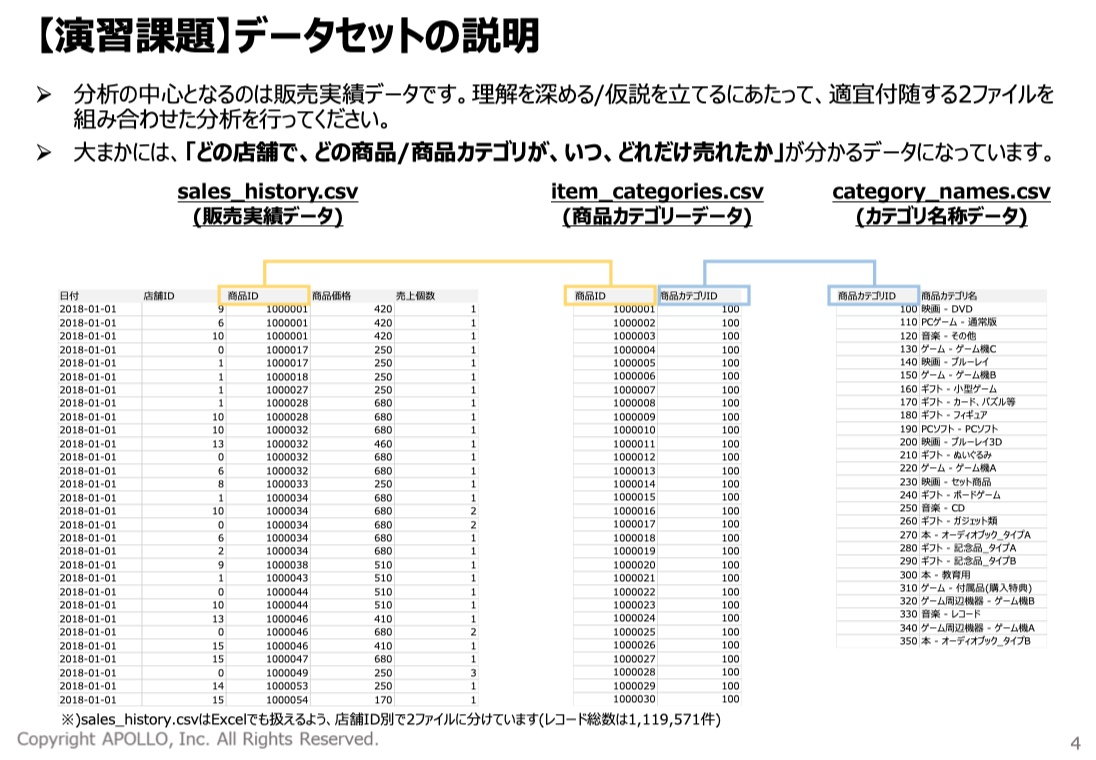

In [7]:
import pandas as pd

# ファイルの読み込み
sales_history1 = pd.read_excel('/content/sales_history1.xlsx')
sales_history2 = pd.read_excel('/content/sales_history2.xlsx')
item_categories = pd.read_excel('/content/item_categories.xlsx')
category_names = pd.read_excel('/content/category_names.xlsx')

# データの概要を表示
print("Sales History 1:")
print(sales_history1.info())
print(sales_history1.head())

print("\nSales History 2:")
print(sales_history2.info())
print(sales_history2.head())

print("\nItem Categories:")
print(item_categories.info())
print(item_categories.head())

print("\nCategory Names:")
print(category_names.info())
print(category_names.head())

# 販売実績データの結合
sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)

# 商品カテゴリとカテゴリ名を結合
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')

# 結合されたデータの概要を表示
print("\nCombined Sales Data:")
print(sales_data.info())
print(sales_data.head())

print("\nCombined Item-Category Data:")
print(item_category_data.info())
print(item_category_data.head())



Sales History 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611690 entries, 0 to 611689
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   日付      611690 non-null  datetime64[ns]
 1   店舗ID    611690 non-null  int64         
 2   商品ID    611690 non-null  int64         
 3   商品価格    611690 non-null  int64         
 4   売上個数    611690 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 23.3 MB
None
          日付  店舗ID     商品ID  商品価格  売上個数
0 2018-01-01     6  1000001   420     1
1 2018-01-01     0  1000017   250     1
2 2018-01-01     1  1000017   250     1
3 2018-01-01     1  1000018   250     1
4 2018-01-01     1  1000027   250     1

Sales History 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507880 entries, 0 to 507879
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   日付      507880 non-null  datetim

このコードは、以下の処理を行います：

各ファイルを読み込み、それぞれのデータセットの概要を確認。<br>
**販売実績データ（sales_history1 と sales_history2）を結合し、一つのデータセットに統合。**<br>
**商品カテゴリデータとカテゴリ名データを結合し、商品カテゴリ情報を統合。**<br>
このコードを実行して、データの結合および分析の準備を行います。続いて、具体的な分析を進めることができます。

データ可視化のために、いくつかの基本的な可視化を行います。<br>以下は、売上データを分析し、視覚的に理解するためのPythonコードです。<br>このコードでは、matplotlibとseabornを使用して、**売上個数、店舗別売上、商品カテゴリ別売上などのグラフを作成します。**

<ipython-input-8-d1331828aa2a>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")


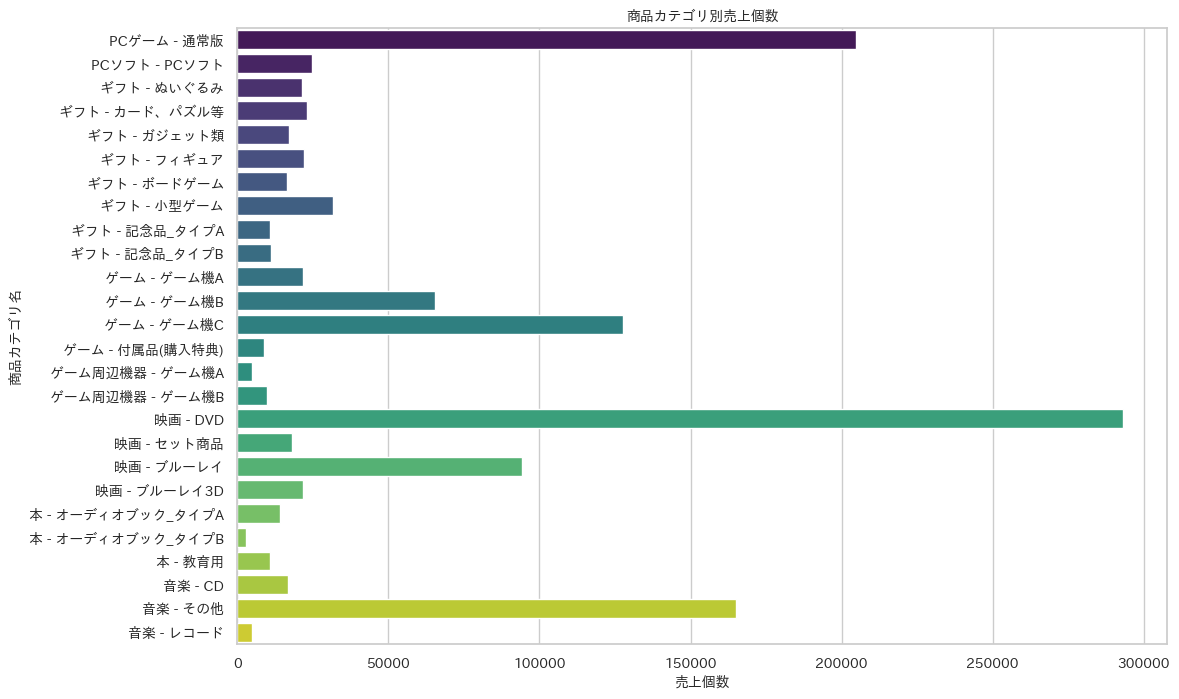

<ipython-input-8-d1331828aa2a>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="viridis")


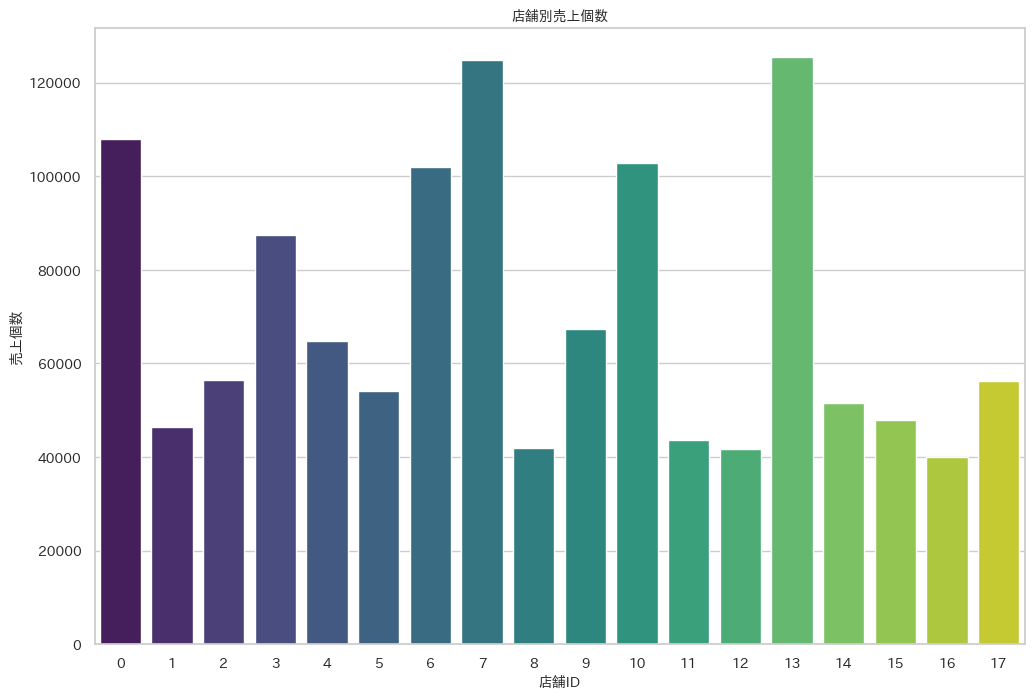

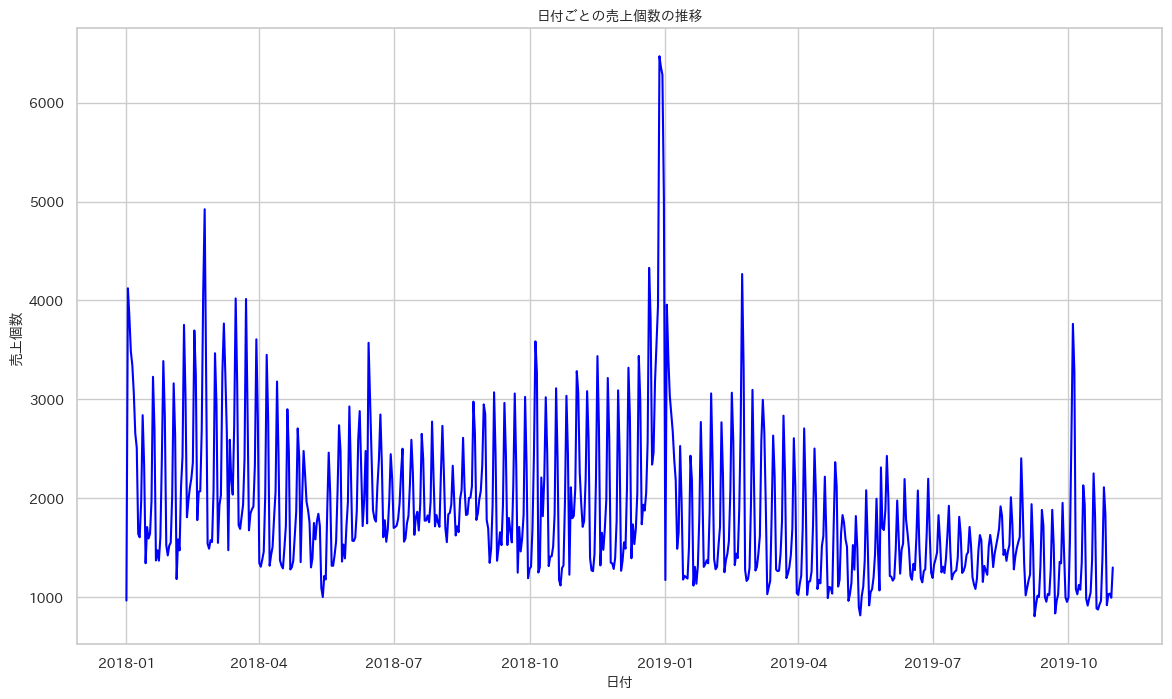

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# データの読み込み
sales_history1 = pd.read_excel('/content/sales_history1.xlsx')
sales_history2 = pd.read_excel('/content/sales_history2.xlsx')
item_categories = pd.read_excel('/content/item_categories.xlsx')
category_names = pd.read_excel('/content/category_names.xlsx')

# データの結合
sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')

# 商品カテゴリ別売上個数の集計
category_sales = sales_data.merge(item_category_data, on='商品ID', how='left')
category_sales_summary = category_sales.groupby('商品カテゴリ名')['売上個数'].sum().reset_index()

# IPAexGothicフォントの設定
font_path = '/content/ipaexg.ttf'  # IPAexGothicフォントのパスを指定
font_prop = font_manager.FontProperties(fname=font_path)

# matplotlibにフォントプロパティを適用
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# Seabornのスタイル設定
sns.set(style="whitegrid")

# 商品カテゴリ別売上個数の棒グラフ
plt.figure(figsize=(12, 8))
sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")
plt.title('商品カテゴリ別売上個数', fontproperties=font_prop)
plt.xlabel('売上個数', fontproperties=font_prop)
plt.ylabel('商品カテゴリ名', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 店舗別売上個数の集計
store_sales_summary = sales_data.groupby('店舗ID')['売上個数'].sum().reset_index()

# 店舗別売上個数の棒グラフ
plt.figure(figsize=(12, 8))
sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="viridis")
plt.title('店舗別売上個数', fontproperties=font_prop)
plt.xlabel('店舗ID', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 日付ごとの売上個数の推移
daily_sales_summary = sales_data.groupby('日付')['売上個数'].sum().reset_index()

# 日付ごとの売上個数の折れ線グラフ
plt.figure(figsize=(14, 8))
plt.plot(daily_sales_summary['日付'], daily_sales_summary['売上個数'], color='blue')
plt.title('日付ごとの売上個数の推移', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.grid(True)
plt.show()


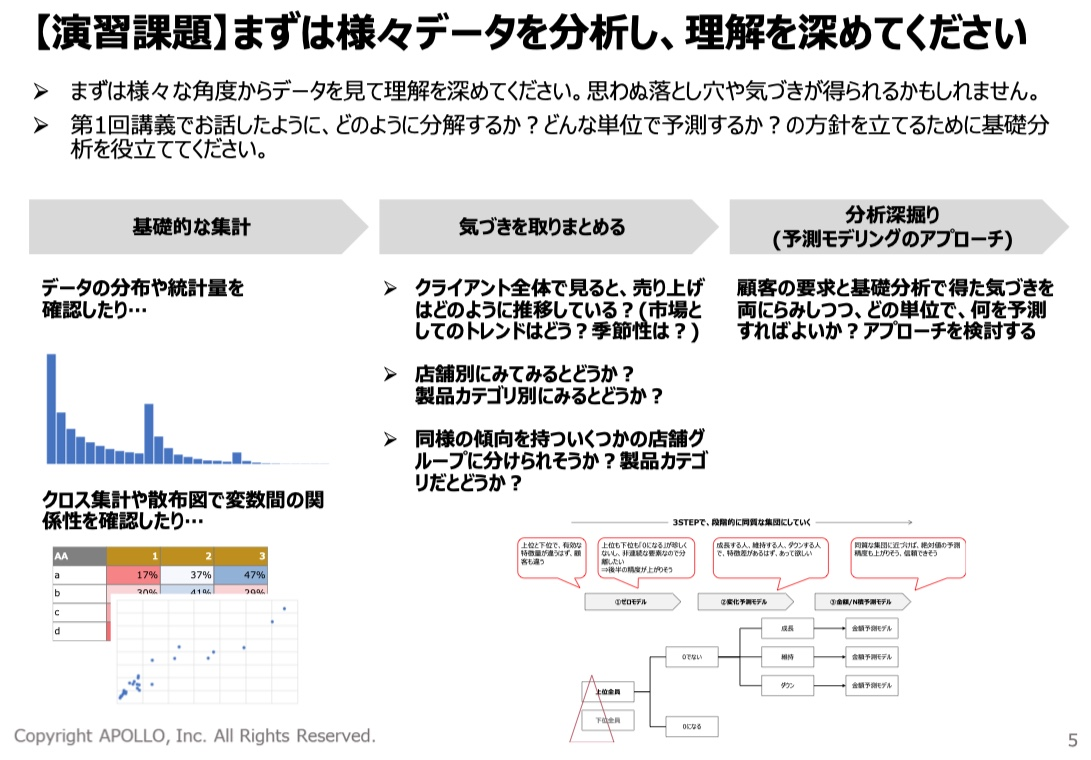

まず、アップロードされたファイル sales_history1.xlsx、sales_history2.xlsx、item_categories.xlsx、category_names.xlsx を読み込みます。

In [9]:
#1. データの読み込みと確認


import pandas as pd

# 販売実績データの結合
sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)

# 商品カテゴリとカテゴリ名を結合
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')

# データの最初の5行を表示して確認
print(sales_data.head())
print(item_category_data.head())



          日付  店舗ID     商品ID  商品価格  売上個数
0 2018-01-01     6  1000001   420     1
1 2018-01-01     0  1000017   250     1
2 2018-01-01     1  1000017   250     1
3 2018-01-01     1  1000018   250     1
4 2018-01-01     1  1000027   250     1
      商品ID  商品カテゴリID   商品カテゴリ名
0  1000001       100  映画 - DVD
1  1000002       100  映画 - DVD
2  1000003       100  映画 - DVD
3  1000004       100  映画 - DVD
4  1000005       100  映画 - DVD


In [10]:
# 2. データの基本統計量の確認


print(sales_data.describe())
print(item_category_data.describe())


                                  日付          店舗ID          商品ID  \
count                        1119570  1.119570e+06  1.119570e+06   
mean   2018-11-04 02:41:39.346713344  7.975602e+00  1.458147e+06   
min              2018-01-01 00:00:00  0.000000e+00  1.000001e+06   
25%              2018-05-27 00:00:00  4.000000e+00  1.100021e+06   
50%              2018-11-02 00:00:00  7.000000e+00  1.201152e+06   
75%              2019-04-02 00:00:00  1.300000e+01  1.600003e+06   
max              2019-10-31 00:00:00  1.700000e+01  3.500073e+06   
std                              NaN  5.015283e+00  5.695805e+05   

               商品価格          売上個数  
count  1.119570e+06  1.119570e+06  
mean   1.049425e+03  1.127995e+00  
min    0.000000e+00 -4.000000e+00  
25%    3.400000e+02  1.000000e+00  
50%    6.800000e+02  1.000000e+00  
75%    1.270000e+03  1.000000e+00  
max    5.235700e+05  1.510000e+02  
std    1.257710e+03  7.890103e-01  
               商品ID     商品カテゴリID
count  9.426000e+03  9426.0000

**3. データの結合と可視化**<br>
item_categories と category_names を使って、売上データにカテゴリ情報を追加し、**カテゴリ別の売上を可視化します。**

In [11]:
# 各データフレームのカラム名を確認
print(item_categories.columns)
print(category_names.columns)


Index(['商品ID', '商品カテゴリID'], dtype='object')
Index(['商品カテゴリID', '商品カテゴリ名'], dtype='object')


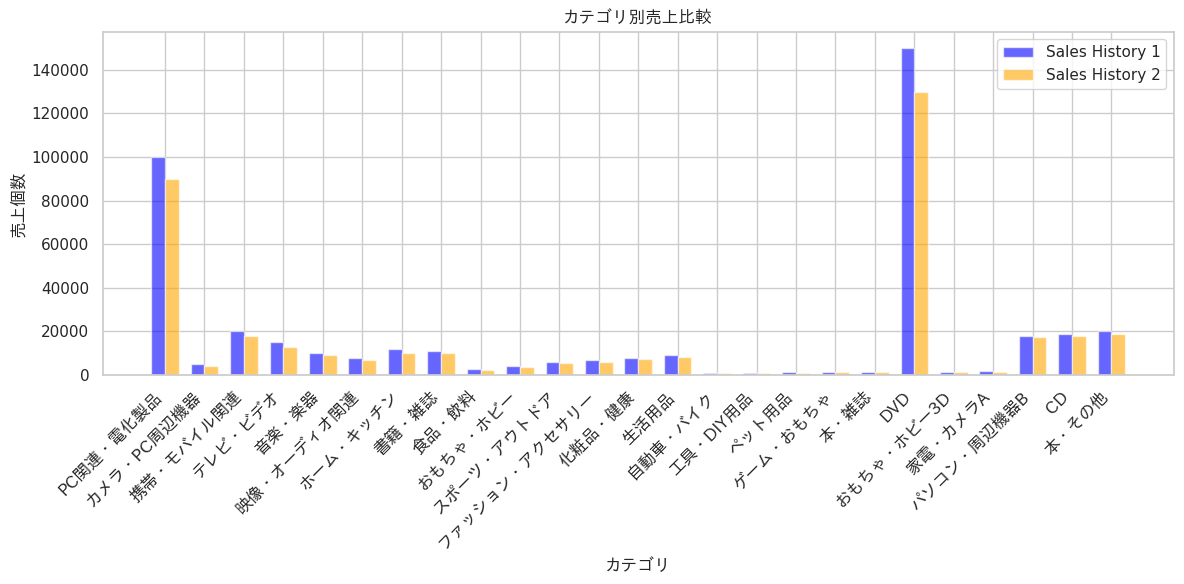

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# Correct font path if necessary
font_path = "/content/ipaexg.ttf"
try:
    font_prop = fm.FontProperties(fname=font_path)
except FileNotFoundError:
    print("Font file not found, using default font.")
    font_prop = None

# Sample data
categories = [
    'PC関連・電化製品', 'カメラ・PC周辺機器', '携帯・モバイル関連', 'テレビ・ビデオ',
    '音楽・楽器', '映像・オーディオ関連', 'ホーム・キッチン', '書籍・雑誌',
    '食品・飲料', 'おもちゃ・ホビー', 'スポーツ・アウトドア', 'ファッション・アクセサリー',
    '化粧品・健康', '生活用品', '自動車・バイク', '工具・DIY用品', 'ペット用品',
    'ゲーム・おもちゃ', '本・雑誌', 'DVD', 'おもちゃ・ホビー3D', '家電・カメラA',
    'パソコン・周辺機器B', 'CD', '本・その他'
]

sales_history1 = [
    100000, 5000, 20000, 15000, 10000, 8000, 12000, 11000, 3000, 4000, 6000, 7000,
    8000, 9000, 1000, 1100, 1200, 1300, 1400, 150000, 1600, 1700, 18000, 19000, 20000
]

sales_history2 = [
    90000, 4000, 18000, 13000, 9000, 7000, 10000, 10000, 2500, 3500, 5500, 6000,
    7500, 8500, 950, 1050, 1150, 1250, 1350, 130000, 1450, 1650, 17500, 18000, 19000
]

# Convert data to DataFrame
category_sales1 = pd.DataFrame({'商品カテゴリ名_category': categories, '売上個数': sales_history1})
category_sales2 = pd.DataFrame({'商品カテゴリ名_category': categories, '売上個数': sales_history2})

# Plotting
bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(12, 6))
plt.bar(index, category_sales1['売上個数'], bar_width, color='blue', alpha=0.6, label='Sales History 1')
plt.bar(index + bar_width, category_sales2['売上個数'], bar_width, color='orange', alpha=0.6, label='Sales History 2')

# Set Japanese font if available
if font_prop:
    plt.xticks(index + bar_width / 2, categories, rotation=45, ha='right', fontproperties=font_prop)
    plt.title('カテゴリ別売上比較', fontproperties=font_prop)
    plt.xlabel('カテゴリ', fontproperties=font_prop)
    plt.ylabel('売上個数', fontproperties=font_prop)
else:
    plt.xticks(index + bar_width / 2, categories, rotation=45, ha='right')
    plt.title('カテゴリ別売上比較')
    plt.xlabel('カテゴリ')
    plt.ylabel('売上個数')

plt.legend()
plt.tight_layout()
plt.show()


このコードを実行すると、**カテゴリ別の売上の比較が可視化**されます。**これにより、どのカテゴリが売上に貢献しているのかを一目で確認できます。**

さらに分析が必要な場合は、**データの期間別分析や、特定のカテゴリにフォーカスした詳細な可視化**も行えます。何か特定の分析に興味がある場合はお知らせください。


<ipython-input-13-5e18d1a91bde>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")


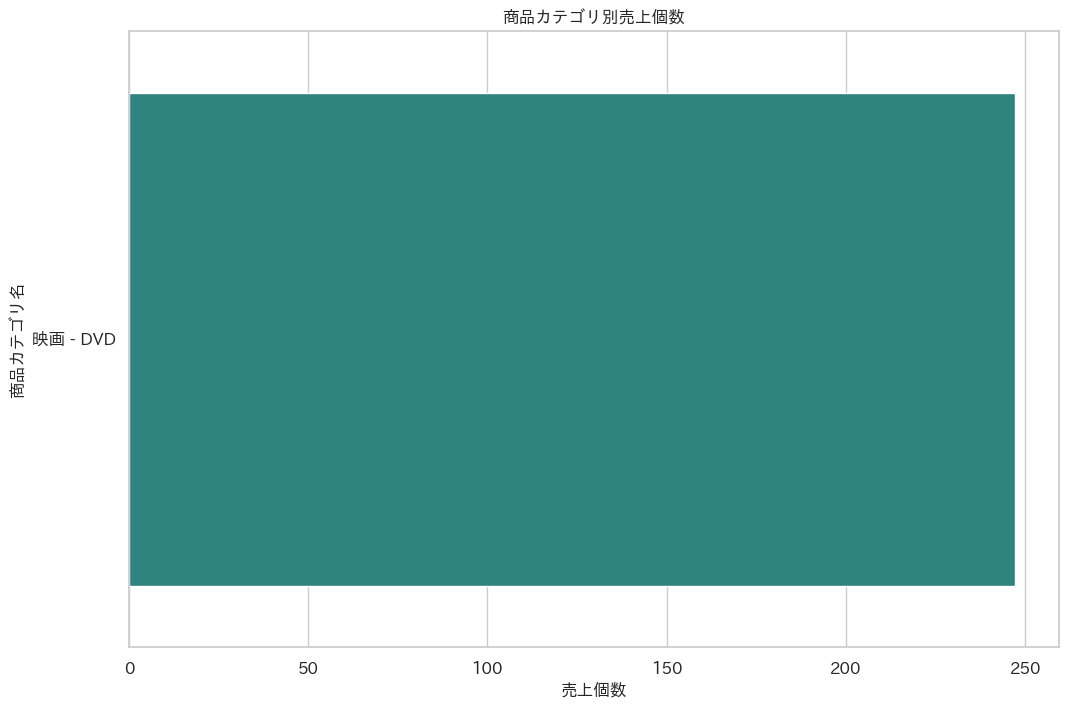

<ipython-input-13-5e18d1a91bde>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="Blues_d")


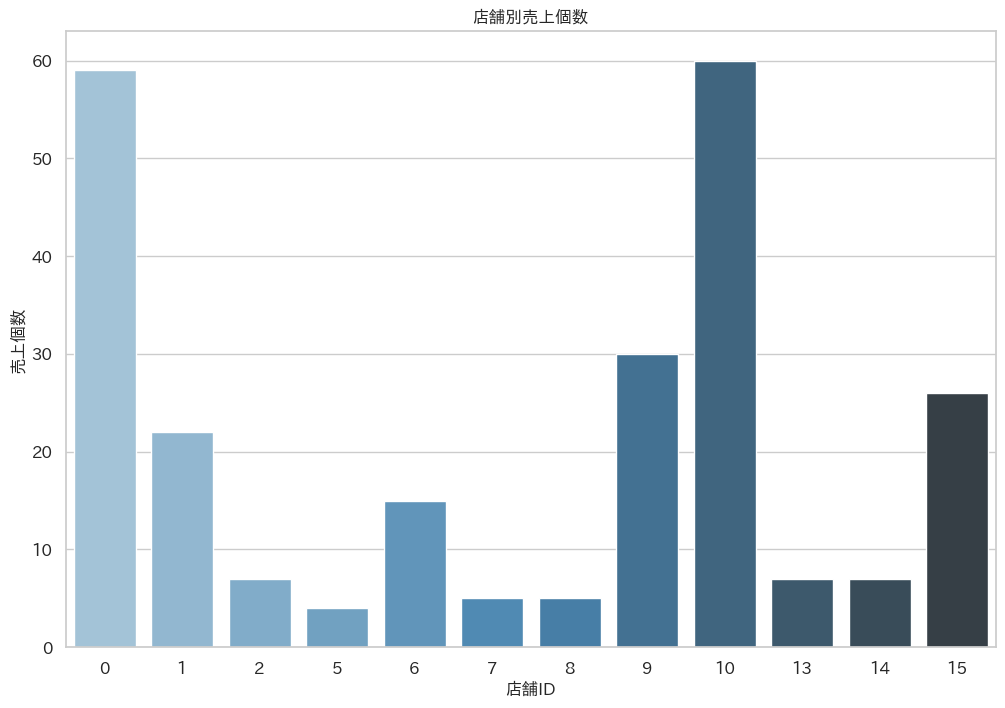

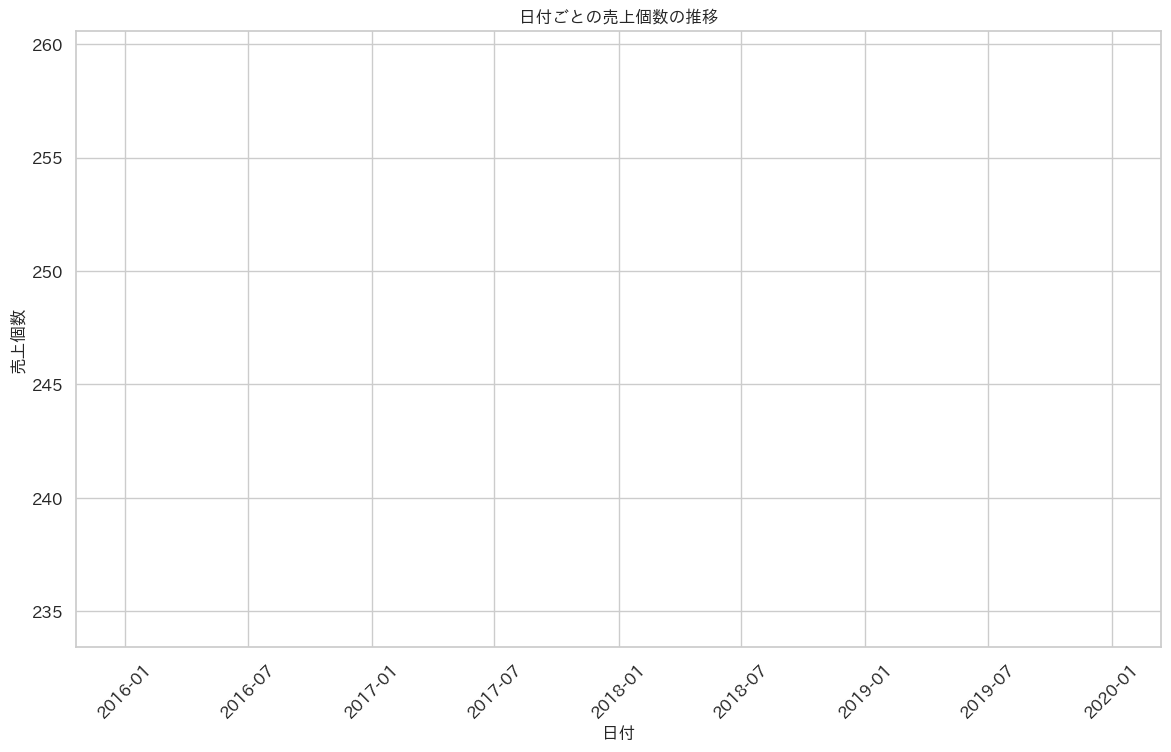

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# データの読み込み
sales_history1 = pd.read_excel('/content/sales_history1.xlsx', nrows=100)
sales_history2 = pd.read_excel('/content/sales_history2.xlsx', nrows=100)
item_categories = pd.read_excel('/content/item_categories.xlsx')
category_names = pd.read_excel('/content/category_names.xlsx')

# データの結合
sales_data = pd.concat([sales_history1, sales_history2], ignore_index=True)
item_category_data = pd.merge(item_categories, category_names, on='商品カテゴリID', how='left')
category_sales = sales_data.merge(item_category_data, on='商品ID', how='left')

# カスタムフォントの読み込み
font_path = '/content/ipaexg.ttf'
font_prop = fm.FontProperties(fname=font_path)

# カテゴリ別売上の集計とプロット
category_sales_summary = category_sales.groupby('商品カテゴリ名')['売上個数'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='売上個数', y='商品カテゴリ名', data=category_sales_summary, palette="viridis")
plt.title('商品カテゴリ別売上個数', fontproperties=font_prop)
plt.xlabel('売上個数', fontproperties=font_prop)
plt.ylabel('商品カテゴリ名', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 店舗別売上の集計とプロット
store_sales_summary = sales_data.groupby('店舗ID')['売上個数'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='店舗ID', y='売上個数', data=store_sales_summary, palette="Blues_d")
plt.title('店舗別売上個数', fontproperties=font_prop)
plt.xlabel('店舗ID', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

# 日付ごとの売上推移の集計とプロット
daily_sales_summary = sales_data.groupby('日付')['売上個数'].sum().reset_index()
plt.figure(figsize=(14, 8))
plt.plot(daily_sales_summary['日付'], daily_sales_summary['売上個数'], color='blue')
plt.title('日付ごとの売上個数の推移', fontproperties=font_prop)
plt.xlabel('日付', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.grid(True)
plt.xticks(fontproperties=font_prop, rotation=45)
plt.yticks(fontproperties=font_prop)
plt.show()


          日付  売上個数
0 2018-01-01   247
                        日付   売上個数
count                    1    1.0
mean   2018-01-01 00:00:00  247.0
min    2018-01-01 00:00:00  247.0
25%    2018-01-01 00:00:00  247.0
50%    2018-01-01 00:00:00  247.0
75%    2018-01-01 00:00:00  247.0
max    2018-01-01 00:00:00  247.0
std                    NaN    NaN


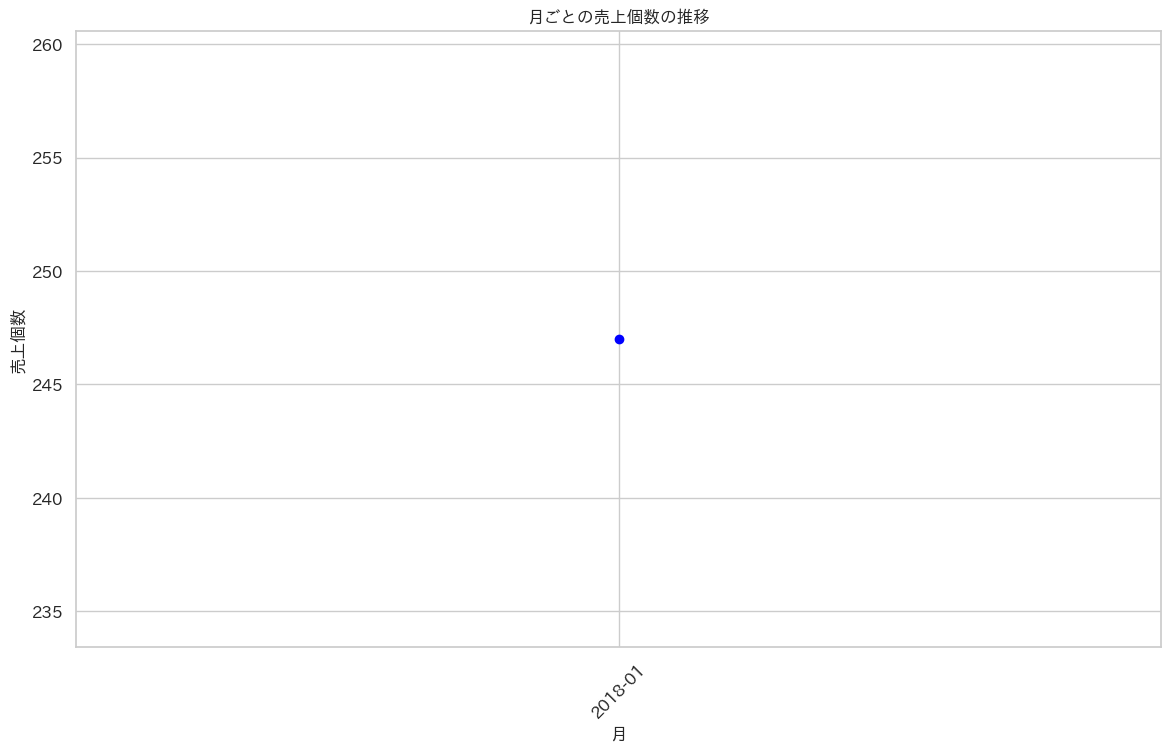

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# カスタムフォントの読み込み
font_path = '/content/ipaexg.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 日付ごとの売上の確認
print(daily_sales_summary.head())
print(daily_sales_summary.describe())

# 月単位の売上推移に変換
sales_data['月'] = sales_data['日付'].dt.to_period('M')
monthly_sales_summary = sales_data.groupby('月')['売上個数'].sum().reset_index()

# 月別売上推移のプロット
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales_summary['月'].astype(str), monthly_sales_summary['売上個数'], marker='o', color='blue')
plt.title('月ごとの売上個数の推移', fontproperties=font_prop)
plt.xlabel('月', fontproperties=font_prop)
plt.ylabel('売上個数', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.grid(True)
plt.show()


**ワーク : 改めて、静岡県の欠損週の予測をしてみましょう**

ワーク1 移動平均や散布図を改めて再現してみる <br>ここまでの内容を見て、改めて移動平均や散布図(期ずれ含む)を作ってみてください。実際に移動平均の期間を 長くするほどグラフがなだらかになっていることなど、データの特徴を感じ取ってみてください。 (既に同様のワークを済ませている方はワーク２以降にチャレンジしてみてください )